# Explore here

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm   # para auto_arima

import pickle


In [5]:
url = "https://breathecode.herokuapp.com/asset/internal-link?id=2546&path=sales.csv"
df = pd.read_csv(url)

df.head()


,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [6]:
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")


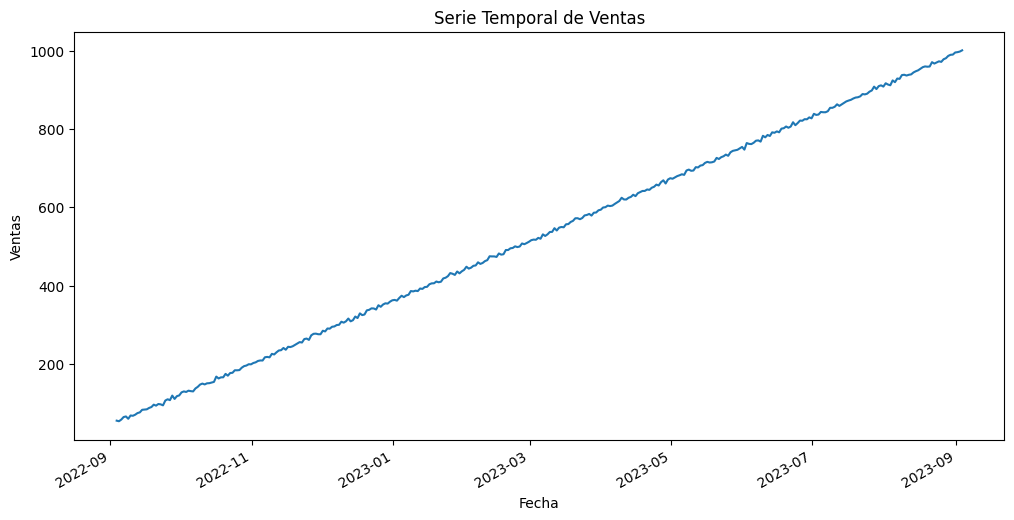

In [7]:
df["sales"].plot(figsize=(12,6))
plt.title("Serie Temporal de Ventas")
plt.ylabel("Ventas")
plt.xlabel("Fecha")
plt.show()


In [8]:
tensor = df.index.to_series().diff().mode()[0]
print("📌 Tensor de la serie temporal:", tensor)


📌 Tensor de la serie temporal: 1 days 00:00:00


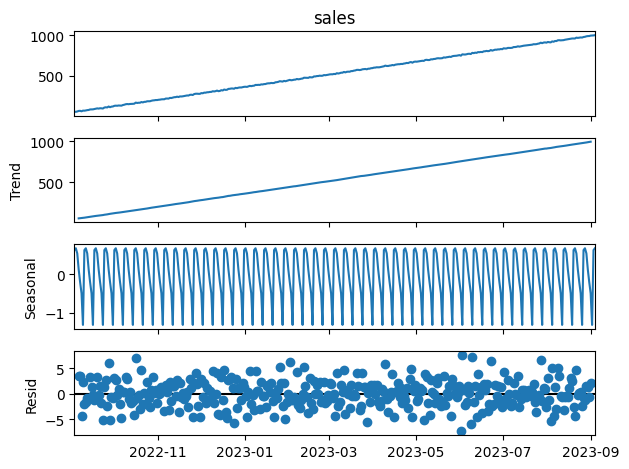

In [9]:
result = seasonal_decompose(df["sales"], model="additive")
result.plot()
plt.show()


In [10]:
adf = adfuller(df["sales"])
print("ADF Statistic:", adf[0])
print("p-value:", adf[1])


ADF Statistic: 0.5454141937063742
p-value: 0.9861899815311063


In [11]:
split = int(len(df) * 0.8)
train = df.iloc[:split]
test = df.iloc[split:]


In [12]:
model_auto = pm.auto_arima(
    train["sales"],
    seasonal=False,
    trace=True,
    error_action="ignore",
    suppress_warnings=True
)
model_auto.summary()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1675.428, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1578.564, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1475.165, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1763.761, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1475.512, Time=0.21 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1475.495, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1479.028, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1762.924, Time=0.02 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.263 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  292
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -734.582
Date:                Sun, 07 Dec 2025   AIC                           1475.165
Time:                        06:31:48   BIC                           1486.185
Sample:                    09-03-2022   HQIC                          1479.579
                         - 06-21-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.5984      0.011    243.641      0.000       2.577       2.619
ma.L1         -0.9439      0.021    -44.117      0.000      -0.986      -0.902
sigma2         9.0537      0.817     11.084      0.000       7.453      10.655
===================================================================================
Ljung-Box (L1) (Q):                   1.34   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.25   Prob(JB):                         0.54
Heteroskedasticity (H):               0.95   Skew:                             0.06
Prob(H) (two-sided):                  0.81   Kurtosis:                         2.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
p, d, q = model_auto.order

model = ARIMA(train["sales"], order=(p,d,q))
model_fit = model.fit()

print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  292
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -879.462
Date:                Sun, 07 Dec 2025   AIC                           1762.924
Time:                        06:31:52   BIC                           1770.271
Sample:                    09-03-2022   HQIC                          1765.867
                         - 06-21-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0758      0.077     -0.981      0.326      -0.227       0.076
sigma2        24.6927      2.048     12.056      0.000      20.679      28.707
Ljung-Box (L1) (Q):                  73.69   Jarque-

/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [14]:
p, d, q = model_auto.order

model = ARIMA(train["sales"], order=(p,d,q))
model_fit = model.fit()

print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  292
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -879.462
Date:                Sun, 07 Dec 2025   AIC                           1762.924
Time:                        06:31:56   BIC                           1770.271
Sample:                    09-03-2022   HQIC                          1765.867
                         - 06-21-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0758      0.077     -0.981      0.326      -0.227       0.076
sigma2        24.6927      2.048     12.056      0.000      20.679      28.707
Ljung-Box (L1) (Q):                  73.69   Jarque-

/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [15]:
preds = model_fit.forecast(steps=len(test))

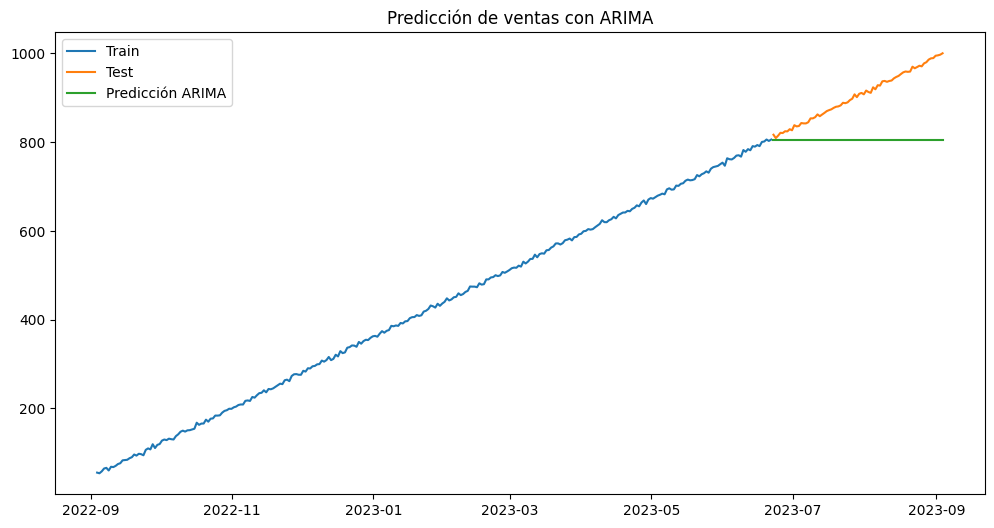

In [16]:
plt.figure(figsize=(12,6))
plt.plot(train.index, train["sales"], label="Train")
plt.plot(test.index, test["sales"], label="Test")
plt.plot(test.index, preds, label="Predicción ARIMA")
plt.legend()
plt.title("Predicción de ventas con ARIMA")
plt.show()


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test["sales"], preds)
mse = mean_squared_error(test["sales"], preds)
rmse = np.sqrt(mse)

print("📉 MAE:", mae)
print("📉 RMSE:", rmse)


📉 MAE: 98.86462982803404
📉 RMSE: 113.37754061886254


In [18]:
with open("modelo_arima_ventas.pkl", "wb") as f:
    pickle.dump(model_fit, f)

print("✅ Modelo guardado como modelo_arima_ventas.pkl")


✅ Modelo guardado como modelo_arima_ventas.pkl
